In [ ]:
# Importing the libraries
import tensorflow as tf
!pip install opencv-python
!git clone https://github.com/advadj67/hw2_M11221004.git

Cloning into 'hw2_M11221004'...
remote: Enumerating objects: 1070, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1070 (delta 0), reused 4 (delta 0), pack-reused 1066
Receiving objects: 100% (1070/1070), 259.32 MiB | 14.64 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (3810/3810), done.


In [ ]:
# 執行函數以刪除 processed_data 資料夾及其所有檔案
import os
import shutil
import numpy as np

def delete_processed_data_folder():
    if os.path.exists('processed_data'):
        shutil.rmtree('processed_data')
        print("已刪除 processed_data 資料夾及其所有檔案")
    else:
        print("無此資料夾")


delete_processed_data_folder()

無此資料夾


In [ ]:
#驗證集&測試集影像處理
import cv2

def resize_and_save_images(input_path, output_path, target_size=(256, 256)):
    # 檢查輸出目錄是否存在，如果不存在則創建
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        print(f"資料夾 '{output_path}' 已建立")
    else:
        print(f"資料夾 '{output_path}' 已存在")

    # 讀取每個Fold中的影像
    for fold_id in range(1, 6):  # 5個Fold資料夾
        for folder_type in ["test", "val"]:  # 只處理 test 和 val 的影像資料夾
            folder_path = os.path.join(input_path, f"Fold{fold_id}", folder_type)
            print(f"Processing images in {folder_path}")

            # 確認輸出目錄是否存在，如果不存在則創建
            output_folder_path = os.path.join(output_path, f"Fold{fold_id}", folder_type)
            if not os.path.exists(output_folder_path):
                os.makedirs(output_folder_path)

            # 讀取並處理影像
            for filename in os.listdir(folder_path):
                if filename.endswith(".jpg"):
                    # 影像的完整路徑
                    image_path = os.path.join(folder_path, filename)
                    # 使用OpenCV讀取影像
                    image = cv2.imread(image_path)
                    # 改變影像大小
                    resized_image = cv2.resize(image, target_size)
                    # 存儲影像
                    save_path = os.path.join(output_folder_path, filename)
                    cv2.imwrite(save_path, resized_image)

    print("驗證集&測試集影像處理完成！")

# 載入影像，並指定輸入和輸出路徑
input_path = "hw2_M11221004/ETT_v3"
output_path = "processed_data"

# 呼叫函數進行影像處理
resize_and_save_images(input_path, output_path)

資料夾 'processed_data' 已建立
Processing images in hw2_M11221004/ETT_v3/Fold1/test
Processing images in hw2_M11221004/ETT_v3/Fold1/val
Processing images in hw2_M11221004/ETT_v3/Fold2/test
Processing images in hw2_M11221004/ETT_v3/Fold2/val
Processing images in hw2_M11221004/ETT_v3/Fold3/test
Processing images in hw2_M11221004/ETT_v3/Fold3/val
Processing images in hw2_M11221004/ETT_v3/Fold4/test
Processing images in hw2_M11221004/ETT_v3/Fold4/val
Processing images in hw2_M11221004/ETT_v3/Fold5/test
Processing images in hw2_M11221004/ETT_v3/Fold5/val
驗證集&測試集影像處理完成！


In [ ]:
#訓練集影像處理
import random

def resize_and_save_images(input_path, output_path, target_size=(256, 256)):

    # 讀取每個Fold中的影像
    for fold_id in range(1, 6):  # 5個Fold資料夾
        folder_path = os.path.join(input_path, f"Fold{fold_id}", "train")
        print(f"Processing images in {folder_path}")

        # 確認輸出目錄是否存在，如果不存在則創建
        output_folder_path = os.path.join(output_path, f"Fold{fold_id}", "train")
        if not os.path.exists(output_folder_path):
            os.makedirs(output_folder_path)

        # 讀取並處理影像
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                # 影像的完整路徑
                image_path = os.path.join(folder_path, filename)
                # 使用OpenCV讀取影像
                image = cv2.imread(image_path)
                # 改變影像大小
                resized_image = cv2.resize(image, target_size)

                # 儲存原始大小的影像
                original_save_path = os.path.join(output_folder_path, filename)
                cv2.imwrite(original_save_path, resized_image)

                # 影像增強方式隨機選擇一種
                enhancement_type = random.choice(["rotation", "contrast", "scale", "brightness"])

                if enhancement_type == "rotation":
                    # 隨機選擇旋轉角度
                    rotation_angle = random.randint(-30, 30)  # 隨機選擇旋轉角度在 -30 度到 30 度之間
                    # 設置旋轉中心點，這裡我們設置為影像中心
                    (h, w) = resized_image.shape[:2]
                    center = (w // 2, h // 2)
                    # 計算旋轉矩陣
                    rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
                    # 進行影像旋轉
                    enhanced_image = cv2.warpAffine(resized_image, rotation_matrix, (w, h))
                    enhanced_save_path = os.path.join(output_folder_path, f"rotated_{filename}")

                elif enhancement_type == "contrast":
                    # 對比度強化
                    alpha = random.uniform(1.0, 1.5)  # 控制對比度強化的倍率，隨機選擇在1.0到1.5之間
                    beta = random.randint(0, 10)  # 控制亮度，隨機選擇在0到10之間
                    enhanced_image = cv2.convertScaleAbs(resized_image, alpha=alpha, beta=beta)
                    enhanced_save_path = os.path.join(output_folder_path, f"enhanced_{filename}")

                elif enhancement_type == "scale":
                    # 縮放影像
                    scale_factor = random.uniform(0.8, 1.2)  # 隨機選擇縮放因子在0.8到1.2之間
                    scaled_image = cv2.resize(resized_image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
                    enhanced_save_path = os.path.join(output_folder_path, f"scaled_{filename}")

                elif enhancement_type == "brightness":
                    # 調整影像亮度
                    brightness_factor = random.uniform(0.5, 1.5)  # 隨機選擇亮度調整因子在0.5到1.5之間
                    enhanced_image = cv2.convertScaleAbs(resized_image, alpha=brightness_factor, beta=0)
                    enhanced_save_path = os.path.join(output_folder_path, f"brightness_{filename}")

                # 儲存增強後的影像
                cv2.imwrite(enhanced_save_path, enhanced_image)

    print("訓練集影像處理完成！")

# 載入影像，並指定輸入和輸出路徑
input_path = "hw2_M11221004/ETT_v3"
output_path = "processed_data"

# 呼叫函數進行影像處理
resize_and_save_images(input_path, output_path)

Processing images in hw2_M11221004/ETT_v3/Fold1/train
Processing images in hw2_M11221004/ETT_v3/Fold2/train
Processing images in hw2_M11221004/ETT_v3/Fold3/train
Processing images in hw2_M11221004/ETT_v3/Fold4/train
Processing images in hw2_M11221004/ETT_v3/Fold5/train
訓練集影像處理完成！


In [ ]:
#輸出影像數量
def count_images_in_folders(root_path):
    # 初始化各類別影像數量為零的字典
    image_counts = {}

    # 遍歷每個 Fold 資料夾
    for fold_id in range(1, 6):
        fold_path = os.path.join(root_path, f"Fold{fold_id}")
        image_counts[fold_id] = {}

        # 遍歷每個資料夾類型
        for folder_type in ["train", "test", "val"]:
            folder_path = os.path.join(fold_path, folder_type)
            image_counts[fold_id][folder_type] = len([filename for filename in os.listdir(folder_path) if filename.endswith(".jpg")])

    return image_counts

# 載入影像，並指定 processed_data 資料夾路徑
root_path = "processed_data"

# 計算每個 Fold 的影像數量
image_counts = count_images_in_folders(root_path)

# 列印結果
for fold_id, counts in image_counts.items():
    print(f"Fold {fold_id}:")
    print(f"  Train影像數量: {counts['train']}")
    print(f"  Test影像數量: {counts['test']}")
    print(f"  Val影像數量: {counts['val']}")


Fold 1:
  Train影像數量: 574
  Test影像數量: 47
  Val影像數量: 47
Fold 2:
  Train影像數量: 574
  Test影像數量: 47
  Val影像數量: 47
Fold 3:
  Train影像數量: 574
  Test影像數量: 47
  Val影像數量: 47
Fold 4:
  Train影像數量: 570
  Test影像數量: 48
  Val影像數量: 48
Fold 5:
  Train影像數量: 570
  Test影像數量: 48
  Val影像數量: 48


In [ ]:
import os
import cv2

# 全部的遮罩處理
def resize_and_save_masks(input_path, output_path, target_size=(256, 256), double_train_masks=True):
    # 讀取每個Fold中的遮罩影像
    for fold_id in range(1, 6):  # 5個Fold資料夾
        for folder_type in ["trainannot", "valannot", "testannot"]:  # 遮罩的資料夾類型
            folder_path = os.path.join(input_path, f"Fold{fold_id}", folder_type)
            print(f"Processing masks in {folder_path}")

            # 確認輸出目錄是否存在，如果不存在則創建
            output_folder_path = os.path.join(output_path, f"Fold{fold_id}", folder_type)
            if not os.path.exists(output_folder_path):
                os.makedirs(output_folder_path)

            # 讀取並處理遮罩影像
            for filename in os.listdir(folder_path):
                if filename.endswith(".png"):
                    # 遮罩影像的完整路徑
                    mask_path = os.path.join(folder_path, filename)
                    # 使用OpenCV讀取遮罩影像
                    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                    # 改變影像大小
                    resized_mask = cv2.resize(mask, target_size)
                    # 存儲遮罩影像
                    save_path = os.path.join(output_folder_path, filename)
                    cv2.imwrite(save_path, resized_mask)

                    # 如果處理的是訓練集的遮罩，並且需要將其複製一份
                    if folder_type == "trainannot" and double_train_masks:
                        new_filename = f"double_{filename}"  # 新檔案名稱為原始檔案名稱前面加上 double_
                        save_path = os.path.join(output_folder_path, new_filename)
                        cv2.imwrite(save_path, resized_mask)

    print("遮罩影像處理完成！")

# 載入遮罩影像，並指定輸入和輸出路徑
input_path = "hw2_M11221004/ETT_v3"
output_path = "processed_data"

# 呼叫函數進行遮罩影像處理，並將訓練集的遮罩影像增加一倍
resize_and_save_masks(input_path, output_path, double_train_masks=True)

Processing masks in hw2_M11221004/ETT_v3/Fold1/trainannot
Processing masks in hw2_M11221004/ETT_v3/Fold1/valannot
Processing masks in hw2_M11221004/ETT_v3/Fold1/testannot
Processing masks in hw2_M11221004/ETT_v3/Fold2/trainannot
Processing masks in hw2_M11221004/ETT_v3/Fold2/valannot
Processing masks in hw2_M11221004/ETT_v3/Fold2/testannot
Processing masks in hw2_M11221004/ETT_v3/Fold3/trainannot
Processing masks in hw2_M11221004/ETT_v3/Fold3/valannot
Processing masks in hw2_M11221004/ETT_v3/Fold3/testannot
Processing masks in hw2_M11221004/ETT_v3/Fold4/trainannot
Processing masks in hw2_M11221004/ETT_v3/Fold4/valannot
Processing masks in hw2_M11221004/ETT_v3/Fold4/testannot
Processing masks in hw2_M11221004/ETT_v3/Fold5/trainannot
Processing masks in hw2_M11221004/ETT_v3/Fold5/valannot
Processing masks in hw2_M11221004/ETT_v3/Fold5/testannot
遮罩影像處理完成！


In [ ]:
# 輸出遮罩數量
def count_masks_in_folders(root_path):
    # 初始化各類別遮罩數量為零的字典
    mask_counts = {}

    # 遍歷每個 Fold 資料夾
    for fold_id in range(1, 6):
        fold_path = os.path.join(root_path, f"Fold{fold_id}")
        mask_counts[fold_id] = {}

        # 遍歷每個資料夾類型
        for folder_type in ["trainannot", "testannot", "valannot"]:
            folder_path = os.path.join(fold_path, folder_type)
            mask_counts[fold_id][folder_type] = len([filename for filename in os.listdir(folder_path) if filename.endswith(".png")])

    return mask_counts

# 載入影像，並指定 processed_data 資料夾路徑
root_path = "processed_data"

# 計算每個 Fold 的遮罩數量
mask_counts = count_masks_in_folders(root_path)

# 列印結果
for fold_id, counts in mask_counts.items():
    print(f"Fold {fold_id}:")
    print(f"  Train遮罩數量: {counts['trainannot']}")
    print(f"  Test遮罩數量: {counts['testannot']}")
    print(f"  Val遮罩數量: {counts['valannot']}")

Fold 1:
  Train遮罩數量: 574
  Test遮罩數量: 47
  Val遮罩數量: 47
Fold 2:
  Train遮罩數量: 574
  Test遮罩數量: 47
  Val遮罩數量: 47
Fold 3:
  Train遮罩數量: 574
  Test遮罩數量: 47
  Val遮罩數量: 47
Fold 4:
  Train遮罩數量: 570
  Test遮罩數量: 48
  Val遮罩數量: 48
Fold 5:
  Train遮罩數量: 570
  Test遮罩數量: 48
  Val遮罩數量: 48


In [ ]:
# 定義 IOU 指標函數
def iou(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    iou_score = intersection / union
    return iou_score

# 定義自定義指標函數
def mean_error(y_true, y_pred, K, P=72):
    absolute_errors = tf.abs(y_true - y_pred)
    total_error = tf.reduce_sum(absolute_errors)
    mean_error = total_error / (K * P)
    return mean_error

def accuracy_within_0_5cm(y_true, y_pred, K, P=72):
    within_0_5cm = tf.reduce_mean(tf.cast(tf.less_equal(tf.abs(y_true - y_pred), P / 2), tf.float32)) * (100 / K)
    return within_0_5cm

def accuracy_within_1cm(y_true, y_pred, K, P=72):
    within_1cm = tf.reduce_mean(tf.cast(tf.less_equal(tf.abs(y_true - y_pred), P), tf.float32)) * (100 / K)
    return within_1cm

# 定義 Dice Loss 函數
def dice_loss(y_true, y_pred):
    smooth = 1e-5
    y_true = tf.cast(y_true, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice = (2. * intersection + smooth) / (union + smooth)
    return 1 - dice

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 定義 Unet++ 模型
def build_unetpp(input_shape):
    # 定義卷積塊
    def conv_block(x, filters, kernel_size=(3, 3), padding='same', activation='relu'):
        # L2 正則化
        x = layers.Conv2D(filters, kernel_size, padding=padding, kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation(activation)(x)
        return x

    # 定義 Encoder 區塊
    def encoder_block(inputs, filters, pool_size=(2, 2)):
        conv = conv_block(inputs, filters)
        pool = layers.MaxPooling2D(pool_size)(conv)
        return conv, pool

    # 定義 Decoder 區塊
    def decoder_block(inputs, skip_features, filters, dropout_rate):
        upsample = layers.UpSampling2D((2, 2))(inputs)
        concat = layers.Concatenate()([upsample, skip_features])
        conv = conv_block(concat, filters)
        if dropout_rate > 0:
            conv = layers.Dropout(dropout_rate)(conv)
        return conv

    inputs = layers.Input(input_shape)

    # Encoder
    conv1, pool1 = encoder_block(inputs, 64)
    conv2, pool2 = encoder_block(pool1, 128)
    conv3, pool3 = encoder_block(pool2, 256)
    conv4, pool4 = encoder_block(pool3, 512)

    # Bridge
    conv5 = conv_block(pool4, 1024)

    # Decoder
    up6 = decoder_block(conv5, conv4, 512, dropout_rate=0.4)
    up7 = decoder_block(up6, conv3, 256, dropout_rate=0.4)
    up8 = decoder_block(up7, conv2, 128, dropout_rate=0.4)
    up9 = decoder_block(up8, conv1, 64, dropout_rate=0.4)

    # Output
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(up9)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    return model

# 建立 Unet++ 模型
input_shape = (256, 256, 1)
unetpp_model = build_unetpp(input_shape)

# 編譯模型，使用 Dice Loss 損失函數
unetpp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=dice_loss, metrics=[iou], run_eagerly=True)

# 編譯模型，使用 IOU 指標
#unetpp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[iou], run_eagerly=True)

# 編譯模型，使用自定義指標
#unetpp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[iou, mean_error, accuracy_within_0_5cm, accuracy_within_1cm],run_eagerly=True)

# 查看模型摘要
#unetpp_model.summary()


Epoch 1/20
144/144 [==============================] - ETA: 0s - loss: 0.9894 - iou: 0.0492
Epoch 1: val_loss improved from inf to 1.03256, saving model to best_model_weights_3.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


144/144 [==============================] - 39s 251ms/step - loss: 0.9894 - iou: 0.0492 - val_loss: 1.0326 - val_iou: 0.0042
Epoch 2/20
144/144 [==============================] - ETA: 0s - loss: 0.9004 - iou: 0.0772
Epoch 2: val_loss improved from 1.03256 to 0.92293, saving model to best_model_weights_3.h5
144/144 [==============================] - 35s 246ms/step - loss: 0.9004 - iou: 0.0772 - val_loss: 0.9229 - val_iou: 0.0642
Epoch 3/20
144/144 [==============================] - ETA: 0s - loss: 0.9025 - iou: 0.0785
Epoch 3: val_loss did not improve from 0.92293
144/144 [==============================] - 37s 255ms/step - loss: 0.9025 - iou: 0.0785 - val_loss: 0.9513 - val_iou: 0.0490
Epoch 4/20
144/144 [==============================] - ETA: 0s - loss: 0.8929 - iou: 0.0813
Epoch 4: val_loss did not improve from 0.92293
144/144 [==============================] - 38s 261ms/step - loss: 0.8929 - iou: 0.0813 - val_loss: 1.0345 - val_iou: 0.0029
Epoch 5/20
144/144 [=========================

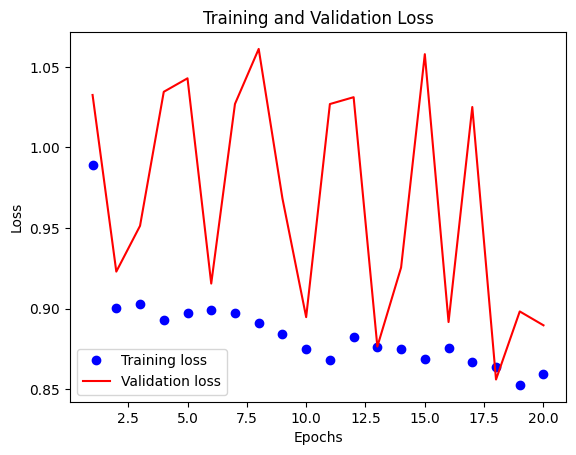

In [ ]:
#加入early stopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

def load_images(image_folder):
    images = []  # 儲存影像的列表

    # 遍歷影像資料夾中的每個檔案
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_folder, filename)  # 影像檔案路徑

            # 載入影像並轉換為張量
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256), color_mode='grayscale')
            image = tf.keras.preprocessing.image.img_to_array(image)  # 將影像轉換為張量
            image /= 255.0  # 對像素值進行正規化，將像素值縮放到 [0, 1] 的範圍內
            images.append(image)

    # 將列表轉換為 numpy 數組並返回
    return np.array(images)


def load_masks(mask_folder):
    masks = []   # 儲存遮罩的列表

    # 遍歷遮罩資料夾中的每個檔案
    for filename in os.listdir(mask_folder):
        if filename.endswith(".png"):
            mask_path = os.path.join(mask_folder, filename)  # 遮罩檔案路徑

            # 載入遮罩並轉換為張量
            mask = tf.keras.preprocessing.image.load_img(mask_path, target_size=(256, 256), color_mode='grayscale')
            mask_array = tf.keras.preprocessing.image.img_to_array(mask)
            mask_array = np.where(mask_array > 0, 1, 0)  # 將像素值大於0的設為1，否則為0
            mask_array = mask_array.astype('float32')
            masks.append(mask_array)

    # 將列表轉換為 numpy 數組並返回
    return np.array(masks)


# 載入資料集
train_image_folder = "processed_data/Fold3/train"
train_mask_folder = "processed_data/Fold3/trainannot"

val_image_folder = "processed_data/Fold3/val"
val_mask_folder = "processed_data/Fold3/valannot"

test_image_folder = "processed_data/Fold3/test"
test_mask_folder = "processed_data/Fold3/testannot"

# 載入訓練集的影像和遮罩
train_images = load_images(train_image_folder)
train_masks = load_masks(train_mask_folder)
# 載入驗證集的影像和遮罩
val_images = load_images(val_image_folder)
val_masks = load_masks(val_mask_folder)
# 載入測試集的影像和遮罩
test_images = load_images(test_image_folder)
test_masks = load_masks(test_mask_folder)

# 定義 early stopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# 設定回調函數以保存驗證損失最低的模型權重並實施 early stopping
checkpoint = ModelCheckpoint("best_model_weights_3.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# 開始訓練模型，將 checkpoint 和 early stopping 回調函數添加到 callbacks 列表中
history = unetpp_model.fit(train_images, train_masks, batch_size=4, epochs=20,
                            validation_data=(val_images, val_masks), callbacks=[checkpoint, early_stopping])
# 提取訓練和驗證損失數據
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 設置 x 軸為 epoch 數量
epochs = range(1, len(train_loss) + 1)

# 繪製訓練集和測試集的損失曲線
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Load model with custom metric
model = load_model("best_model_weights_3.h5", custom_objects={'dice_loss': dice_loss, 'iou': iou})

# Evaluate IOU on test set
test_iou = model.evaluate(test_images, test_masks)[1]
print("Test IOU:", test_iou)

2/2 [==============================] - 1s 173ms/step - loss: 0.8432 - iou: 0.1132
Test IOU: 0.1132458746433258


2/2 [==============================] - 1s 348ms/step


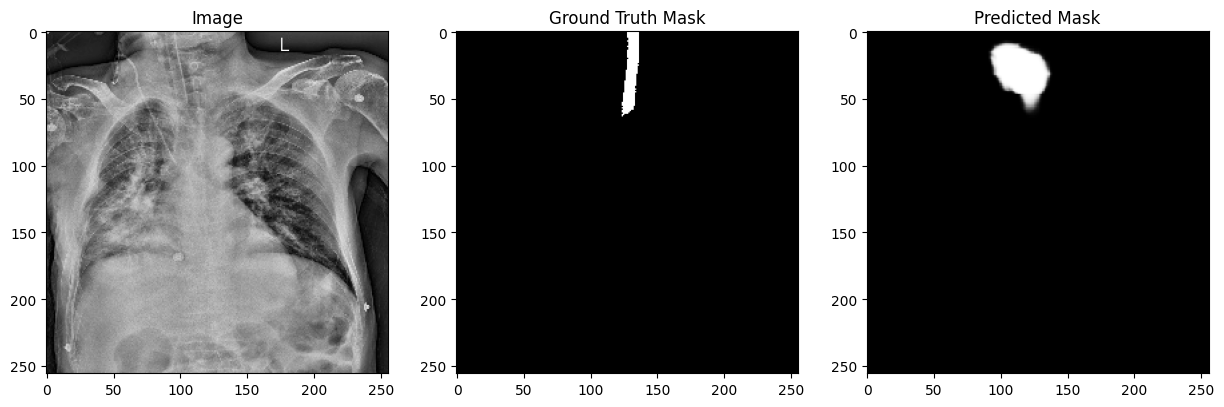

In [ ]:
import matplotlib.pyplot as plt

# 預測測試集的遮罩圖像
predicted_masks = model.predict(test_images)

# 顯示原圖、真實圖和預測圖
num_images = min(5, len(test_images))  # 限制顯示的圖片數量
for i in range(num_images):
    plt.figure(figsize=(15, 5))

    # 原圖
    plt.subplot(1, 3, 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title("Image")

    # 真實圖
    plt.subplot(1, 3, 2)
    plt.imshow(test_masks[i], cmap='gray')
    plt.title("Ground Truth Mask")

    # 預測圖
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i], cmap='gray')
    plt.title("Predicted Mask")

    plt.show()


In [ ]:
#繪製模型架構圖
'''
import tensorflow.keras.utils as ku
import matplotlib.pyplot as plt

ku.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# 或者直接使用matplotlib
plt.figure(figsize=(50, 50))
plt.imshow(plt.imread('model_plot.png'))
plt.axis('off')
plt.show()
'''

"\nimport tensorflow.keras.utils as ku\nimport matplotlib.pyplot as plt\n\nku.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)\n\n# 或者直接使用matplotlib\nplt.figure(figsize=(50, 50))\nplt.imshow(plt.imread('model_plot.png'))\nplt.axis('off')\nplt.show()\n"